<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Hands-on Lab : Web Scraping**


Estimated time needed: **30 to 45** minutes


## Objectives


In this lab you will perform the following:


* Extract information from a given web site
* Write the scraped data into a csv file.


## Extract information from the given web site
You will extract the data from the below web site: <br>


In [10]:
#this url contains the data you need to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

The data you need to scrape is the **name of the programming language** and **average annual salary**.<br> It is a good idea to open the url in your web broswer and study the contents of the web page before you start to scrape.


Import the required libraries


In [11]:
# Your code here
import requests
from bs4 import BeautifulSoup
import pandas as pd

Download the webpage at the url


In [12]:
#your code goes here
data = requests.get(url).text

Create a soup object


In [13]:
#your code goes here
soup = BeautifulSoup(data,'html.parser')

In [14]:
beautify = soup.prettify()
print(beautify)

<!DOCTYPE html>
<html lang="en">
 <head>
  <title>
   Salary survey results of programming languages
  </title>
  <style>
   table, th, td {
  border: 1px solid black;
}
  </style>
 </head>
 <body>
  <hr/>
  <h2>
   Popular Programming Languages
  </h2>
  <hr/>
  <p>
   Finding out which is the best language is a tough task. A programming language is created to solve a specific problem. A language which is good for task A may not be able to properly handle task B. Comparing programming language is never easy. What we can do, however, is find which is popular in the industry.
  </p>
  <p>
   There are many ways to find the popularity of a programming languages. Counting the number of google searchs for each language is a simple way to find the popularity. GitHub and StackOverflow also can give some good pointers.
  </p>
  <p>
   Salary surveys are a way to find out the programmings languages that are most in demand in the industry. Below table is the result of one such survey. When usin

Scrape the `Language name` and `annual average salary`.


In [16]:
#your code goes here
Programming_Languages = pd.DataFrame(columns=['Language name','annual average salary'])
table = soup.find('table')
# print(table)
rows = table.find_all('tr')
# Skip the header row
for row in rows[1:]:

    cols =  row.find_all('td')
    language_name=cols[1].get_text()
    annual_salary=cols[3].get_text()
    new_row = pd.DataFrame({'Language name': [language_name], 'annual average salary': [annual_salary]})
    Programming_Languages = pd.concat([Programming_Languages, new_row], ignore_index=True)


# Programming_Languages.drop(index=Programming_Languages.index[0],axis=0,inplace=True)
Programming_Languages.head(10)


,Language name,annual average salary
0,Python,"$114,383"
1,Java,"$101,013"
2,R,"$92,037"
3,Javascript,"$110,981"
4,Swift,"$130,801"
5,C++,"$113,865"
6,C#,"$88,726"
7,PHP,"$84,727"
8,SQL,"$84,793"
9,Go,"$94,082"


Save the scrapped data into a file named *popular-languages.csv*


In [21]:
Programming_Languages.columns
Programming_Languages['annual average salary'] = Programming_Languages['annual average salary'].str.replace('$','')
Programming_Languages['annual average salary'] = Programming_Languages['annual average salary'].str.replace(',','')
Programming_Languages['annual average salary'] = Programming_Languages['annual average salary'].astype(float)
Programming_Languages.head(10)

,Language name,annual average salary
0,Python,114383.0
1,Java,101013.0
2,R,92037.0
3,Javascript,110981.0
4,Swift,130801.0
5,C++,113865.0
6,C#,88726.0
7,PHP,84727.0
8,SQL,84793.0
9,Go,94082.0


In [22]:
Programming_Languages.dtypes

,0
Language name,object
annual average salary,float64


<ipython-input-120-0c7a33a582d2>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y= df_sorted['Language name'], x= df_sorted['annual average salary'], palette='pastel', orient='h')


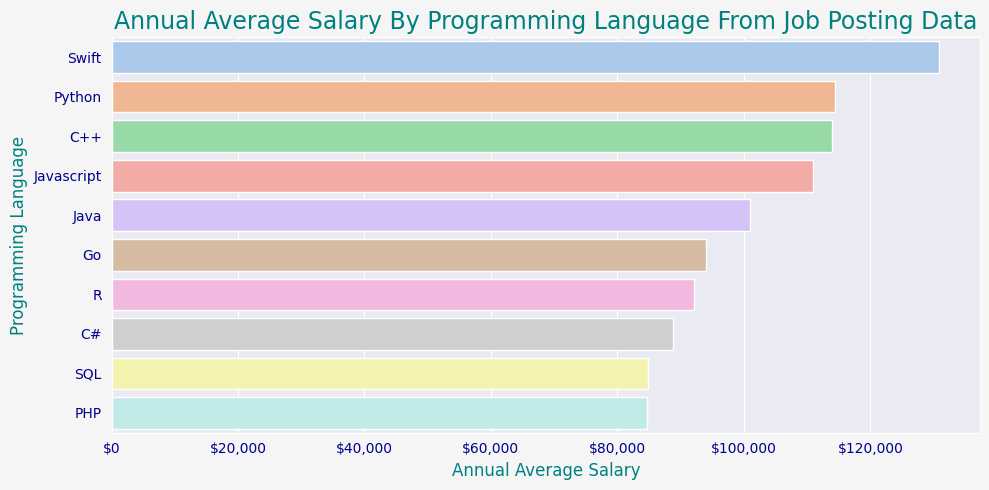

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns

df_sorted = Programming_Languages.sort_values(by='annual average salary', ascending=False)
df_sorted.head(10)

# figsize=(35, 15)
plt.figure(figsize=(10, 5), facecolor='#F5F5F5')


# Set a nicer background color
sns.set_style("darkgrid")

# Create the bar plot with colors and legends

sns.barplot(y= df_sorted['Language name'], x= df_sorted['annual average salary'], palette='pastel', orient='h')

# plt.bar(df_sorted['Language name'], df_sorted['annual average salary'])
# plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: '${x:,.0f}'.format(x)))
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x)))

plt.ylabel('Programming Language',color='#008080', fontsize=12)
plt.xlabel('Annual Average Salary',color='#008080', fontsize=12)
plt.title('Annual Average Salary By Programming Language From Job Posting Data',color='#008080', fontsize=17)
# plt.xticks(ticks=years, rotation=75, ha='right', fontsize=22,color='darkblue')
plt.xticks(   fontsize=10,color='darkblue') #rotation=75,ha='right',
plt.yticks(fontsize=10,color='darkblue')
# plt.legend(fontsize=20, loc='upper right', facecolor='lightgray', edgecolor='black')
plt.tight_layout()

plt.show()

<ipython-input-50-5412ee515150>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= df_sorted['Language name'], y= df_sorted['annual average salary'], palette='pastel')


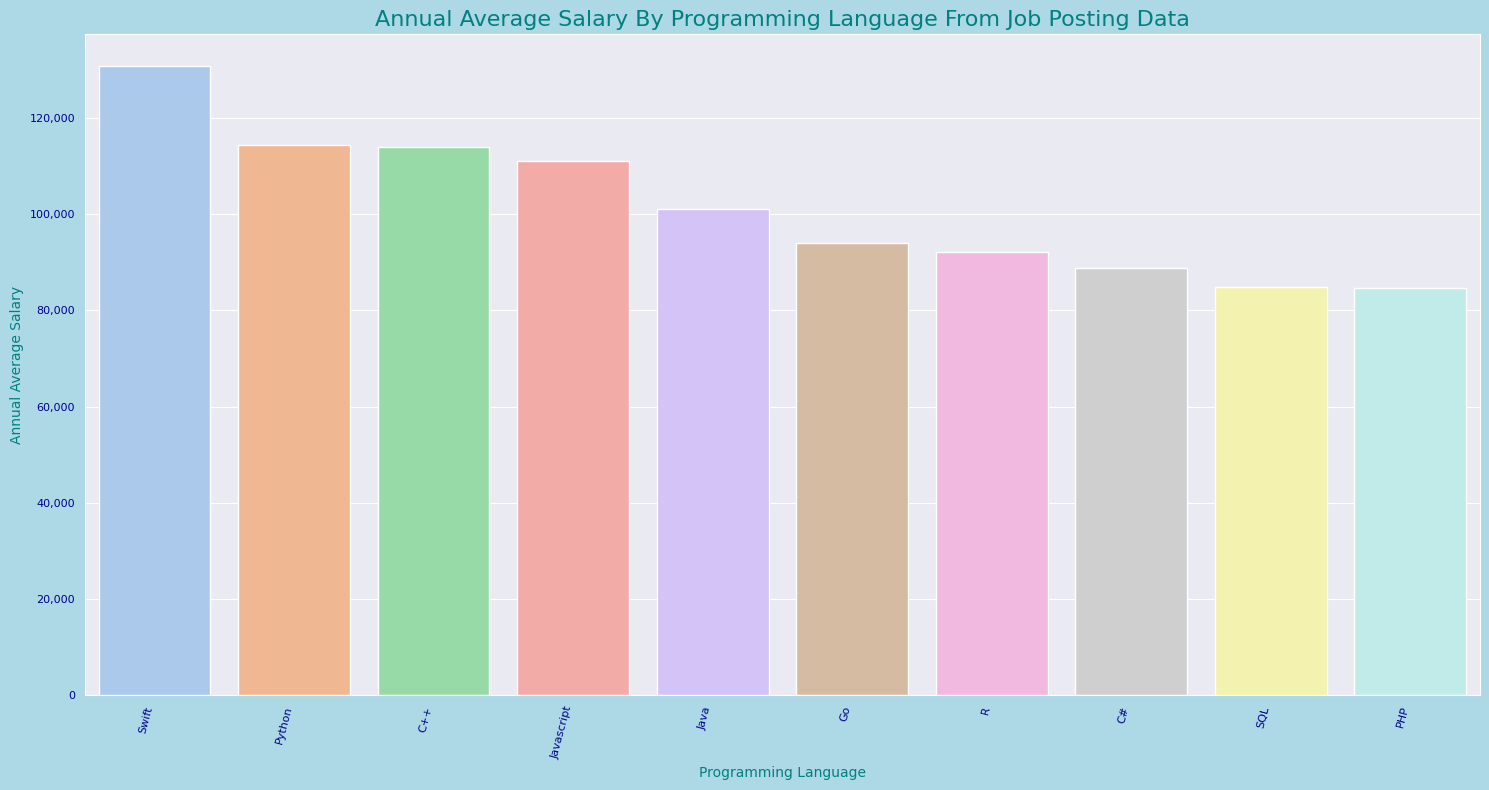

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

df_sorted = Programming_Languages.sort_values(by='annual average salary', ascending=False)
df_sorted.head(10)

# Configure the figure
plt.figure(figsize=(15, 8), facecolor='lightblue')
sns.set_style("darkgrid")

# Create the bar plot
sns.barplot(x= df_sorted['Language name'], y= df_sorted['annual average salary'], palette='pastel')

# Format y-axis labels
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))

# Customize labels and title
plt.xlabel('Programming Language', color='#008080', fontsize=10)
plt.ylabel('Annual Average Salary', color='#008080', fontsize=10)
plt.title('Annual Average Salary By Programming Language From Job Posting Data', color='#008080', fontsize=16)

# Rotate x-axis labels
plt.xticks(rotation=75, ha='right', fontsize=8, color='darkblue')
plt.yticks(fontsize=8, color='darkblue')

# Add legend (optional)
if len(df_sorted) > 10:  # Check if there are more than 10 languages (to avoid empty legend)
    plt.legend(fontsize=12, loc='upper right', facecolor='lightgray', edgecolor='black')

plt.tight_layout()
plt.show()


In [ ]:
# your code goes here
Programming_Languages.to_csv('popular-languages.csv', index=False)
print("The Data has been saved into the file popular-languages.csv")

The Data has been saved into the file popular-languages.csv


In [ ]:
df2 = pd.read_csv('popular-languages.csv')
df2.head(10)

,Language name,annual average salary
0,Python,"$114,383"
1,Java,"$101,013"
2,R,"$92,037"
3,Javascript,"$110,981"
4,Swift,"$130,801"
5,C++,"$113,865"
6,C#,"$88,726"
7,PHP,"$84,727"
8,SQL,"$84,793"
9,Go,"$94,082"


## Authors


Ramesh Sannareddy


In [ ]:
import re

l = [
    "The man walked the dog",
    "The lady walked the dog",
    "Dogs are cool",
    "Cats are interesting creatures",
    "Cats and Dogs was an interesting movie",
    "The man has a brown dog",
    "the manner dogma"
]

words = ["man", "dog"]
results = [x for x in l if all(re.search("\\b{}\\b".format(w), x) for w in words)]
results

>>> ['The man walked the dog', 'The man has a brown dog']

In [113]:
tech = "C++"
tech = tech.lower()
print(tech)
if tech in ['c', 'c#', 'c++']:
    print(f"{tech} is one of the special cases!")


c++
c++ is one of the special cases!


In [ ]:
import re
technology_skills = [
    "C", "C#","C++","Java","JavaScript","Python","Scala",
    "Oracle","SQL Server","MySQL","PostgreSQL","MongoDB"]
jobs_list = ["jquery| Scala|sql server| net asp net| C++| microsoft|JavaScript|test PostgreSQL tools| sql| C",
          "microsoft sql server| net asp net| C++| C testing| PostgreSQL| microsoft| MongoDB| sql| C",
          "microsoft sql server db| PostgreSQL| C++ | testing| ado.net| microsoft| JavaScript tools| sql| C",
          "Python| c++ Application programming| MySQL | Wordpress| PHP| CakePHP| C| MVC| Zend| Software services",
          "Drupal|sql server developer|MySQL| Java| PHP| C| c#| JavaScript| Zend| Software services",
          "microsoft sql server| net asp net|test C++| Java testing| ado.net|  Scala tools| sql| C|Oracle ",
          "microsoft sql server| net asp net| C++| Java testing| ado.net| MongoDB tools| Scala tools| sql| C",
          "database sql server | C++ developer|C| JavaScript",
          "database sql server| MongoDB |c++ Application programming| MySQL|",
          "microsoft sql server|JavaScript"]
for tech in technology_skills:
  # regex = r"({})".format("|".join(tech.split()))
  tech = tech.lower()
  regex = r"({})".format(re.escape(tech))
  no = 0
  for skills in jobs_list:
    skills_list = re.split('\|', skills)
    found = False
    skills_list = [skill.lower() for skill in skills_list]
    for skill in skills_list:
      if (re.search(regex, skill)):
        found = True
        print(f"{tech} found here: {skill}")
        no +=1
        break
  print(f"{tech}: {no}")

# c: 10 ----> 9
# c#: 1 ----> 1
# c++: 8  ----> 8
# java: 7 ----> 3
# javascript: 5 ---->5
# python: 1 ---->1
# scala: 3 ----> 3
# oracle: 1 ---->1
# sql server: 9 ---->9
# mysql: 3 ----> 3
# postgresql: 3 ----> 3
# mongodb: 3 ----> 3



In [112]:
import re

technology_skills = [
    "C", "C#","C++","Java","JavaScript","Python","Scala",
    "Oracle","SQL Server","MySQL","PostgreSQL","MongoDB"
]

jobs_list = [
    "jquery| Scala|sql server| net asp net| C++| microsoft|JavaScript|test PostgreSQL tools| sql| C",
    "microsoft sql server| net asp net| C++| C testing| PostgreSQL| microsoft| MongoDB| sql| C",
    "microsoft sql server db| PostgreSQL| C++ | testing| ado.net| microsoft| JavaScript tools| sql| C",
    "Python| c++ Application programming| MySQL | Wordpress| PHP| CakePHP| C| MVC| Zend| Software services",
    "Drupal|sql server developer|MySQL| Java| PHP| C| c#| JavaScript| Zend| Software services",
    "microsoft sql server| net asp net|test C++| Java testing| ado.net|  Scala tools| sql| C|Oracle ",
    "microsoft sql server| net asp net| C++| Java testing| ado.net| MongoDB tools| Scala tools| sql| C",
    "database sql server | C++ developer|C| JavaScript",
    "database sql server| MongoDB |c++ Application programming| MySQL|",
    "microsoft sql server|JavaScript"
]

for tech in technology_skills:
    tech_lower = tech.lower()
    if tech == "C":
        # Match 'C' as a standalone word, not as part of 'C#' or 'C++'
        regex = r"\bc\b(?![#\+])"
    elif tech in ["C#", "C++"]:  # Combine C# and C++ into one condition
        # Match 'C#' or 'C++' with optional word boundary after
        # regex = r"\b{}(?!\w)\b".format(re.escape(tech_lower))
        print("we are here it is c++, c#",re.escape(tech_lower))
        regex = rf"{re.escape(tech_lower)}"
    else:
        # For other skills, use word boundaries
        regex = r"\b{}\b".format(re.escape(tech_lower))
    no = 0
    for skills in jobs_list:
        skills_list = re.split(r'\|', skills)
        skills_list = [skill.strip().lower() for skill in skills_list]
        for skill in skills_list:
            if re.search(regex, skill):
                print(f"{tech} found here: {skill}")
                no += 1
                break
    print(f"There are: {no} jobs that need {tech} skill \n")


C found here: c
C found here: c testing
C found here: c
C found here: c
C found here: c
C found here: c
C found here: c
C found here: c
There are: 8 jobs that need C skill 

we are here it is c++, c# c\#
C# found here: c#
There are: 1 jobs that need C# skill 

we are here it is c++, c# c\+\+
C++ found here: c++
C++ found here: c++
C++ found here: c++
C++ found here: c++ application programming
C++ found here: test c++
C++ found here: c++
C++ found here: c++ developer
C++ found here: c++ application programming
There are: 8 jobs that need C++ skill 

Java found here: java
Java found here: java testing
Java found here: java testing
There are: 3 jobs that need Java skill 

JavaScript found here: javascript
JavaScript found here: javascript tools
JavaScript found here: javascript
JavaScript found here: javascript
JavaScript found here: javascript
There are: 5 jobs that need JavaScript skill 

Python found here: python
There are: 1 jobs that need Python skill 

Scala found here: scala
Scala

In [104]:
import re

for tech in technology_skills:
    # Escape the technology name to avoid any special character issues
    tech_lower = tech.lower()

    # Specific handling for C, C#, and C++
    if tech == "C":
        # Match 'C' as a standalone word only
        regex = r"\bc\b(?![#\+])"
    elif tech == "C#":
        # Match 'C#' exactly
        regex = r"\bc\#\b"
    elif tech == "C++":
        # Match 'C++' exactly
        regex = r"\bc\+\+\b"
    else:
        # For other skills, use word boundaries and escape any special characters
        regex = r"\b{}\b".format(re.escape(tech_lower))

    no = 0
    for skills in jobs_list:
        skills_list = re.split(r'\|', skills)
        skills_list = [skill.strip().lower() for skill in skills_list]
        for skill in skills_list:
            if re.search(regex,skill):
                print(f"{tech} found here: {skill}")
                no += 1
                break
    print(f"{tech}: {no}")


C found here: c++
C found here: c++
C found here: c++
C found here: c++ application programming
C found here: c
C found here: test c++
C found here: c++
C found here: c++ developer
C found here: c++ application programming
C: 9
C#: 0
C++: 0
Java found here: java
Java found here: java testing
Java found here: java testing
Java: 3
JavaScript found here: javascript
JavaScript found here: javascript tools
JavaScript found here: javascript
JavaScript found here: javascript
JavaScript found here: javascript
JavaScript: 5
Python found here: python
Python: 1
Scala found here: scala
Scala found here: scala tools
Scala found here: scala tools
Scala: 3
Oracle found here: oracle
Oracle: 1
SQL Server: 0
MySQL found here: mysql
MySQL found here: mysql
MySQL found here: mysql
MySQL: 3
PostgreSQL found here: test postgresql tools
PostgreSQL found here: postgresql
PostgreSQL found here: postgresql
PostgreSQL: 3
MongoDB found here: mongodb
MongoDB found here: mongodb tools
MongoDB found here: mongodb
Mo

### Other Contributors


Rav Ahuja


## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-10-17  | 0.1  | Ramesh Sannareddy  |  Created initial version of the lab |


 Copyright &copy; 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01).
